In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')
import scikit_posthocs as sp

In [3]:
from statsmodels.stats.diagnostic import lilliefors

In [4]:
df = pd.read_csv("./scores.csv",  index_col=0).dropna()

In [5]:
for s in ['CHI', 'MATH', 'ENG']:
    df["%s"%(s)] = 0
    for t in range(6, 10):
        for i in range(1, 3):
            for j in range(1, 3):
                if(t == 9):
                    if(i == 2 and j ==2):
                        continue
                df["s%d%d%d"%(t, i, j)] = 0 if s == 'CHI' else df["s%d%d%d"%(t, i, j)]
                df["l%d%d%d"%(t, i, j)] = 0 if s == 'CHI' else df["l%d%d%d"%(t, i, j)]
                all = 100
                if(t == 8 and i == 2 and j == 2):
                    all = 120
                elif(t == 9):
                    all = 150
                df["%s"%(s)] += df["%s%d%d%d"%(s, t, i, j)] / all
                if s == 'MATH':
                    df["s%d%d%d"%(t, i, j)] += df["%s%d%d%d"%(s, t, i, j)] / all
                else:
                    df["l%d%d%d"%(t, i, j)] += df["%s%d%d%d"%(s, t, i, j)] / all
    df["%s"%(s)] /= 15
    
for s in ['PHY', 'CHE']:
    df["%s"%(s)] = 0
    for t in range(8, 10):
        if(s == "CHE" and t == 8):
            continue
        for i in range(1, 3):
            for j in range(1, 3):
                all = 100
                if(t == 9):
                    if(j == 1):
                        all = 90 if s == 'PHY' else 60
                    if(i == 2 and j == 2):
                        continue
                df["%s"%(s)] += df["%s%d%d%d"%(s, t, i, j)] / all
                df["s%d%d%d"%(t, i, j)] += df["%s%d%d%d"%(s, t, i, j)] / all
    if s == 'PHY': df["%s"%(s)] /= 7
    elif s == 'CHE': df["%s"%(s)] /=3


for t in range(6, 10):
    for i in range(1, 3):
        for j in range(1, 3):
            if t == 9:
                if(i == 2 and j ==2):
                    continue
                df["s%d%d%d"%(t, i, j)] /= 3
                df["l%d%d%d"%(t, i, j)] /= 2
            elif t == 8:
                df["s%d%d%d"%(t, i, j)] /= 2
                df["l%d%d%d"%(t, i, j)] /= 2
            else:
                df["s%d%d%d"%(t, i, j)] /= 1
                df["l%d%d%d"%(t, i, j)] /= 2

In [6]:
post_string = {'s':[], 'l':[]}
for s in ['s', 'l']:
    for t in range(6, 10):
        for i in range(1, 3):
            for j in range(1, 3):
                if t == 9:
                    if(i == 2 and j ==2):
                        continue
                post_string[s].append("%s%d%d%d"%(s, t, i, j))
data_time_s = df[[i for i in post_string['s']]]
data_time_l = df[[i for i in post_string['l']]]

In [7]:
for idx in data_time_s.columns:
    data_time_s = data_time_s.rename(columns={idx: idx[1:]})
for idx in data_time_l.columns:
    data_time_l = data_time_l.rename(columns={idx: idx[1:]})

In [8]:
df[['CHI', 'MATH', 'ENG', 'PHY', 'CHE']].corr("spearman")

,CHI,MATH,ENG,PHY,CHE
CHI,1.000000,0.827022,0.881731,0.778642,0.739579
MATH,0.827022,1.000000,0.871284,0.909195,0.875837
ENG,0.881731,0.871284,1.000000,0.823858,0.762063
PHY,0.778642,0.909195,0.823858,1.000000,0.889688
CHE,0.739579,0.875837,0.762063,0.889688,1.000000


In [98]:
for i in ['CHI', 'MATH', 'ENG', 'PHY', 'CHE']:
    print(i, " - lilliefors: ",lilliefors(df[i]))

CHI  - lilliefors:  (0.08454063943220269, 0.005185819639612137)
MATH  - lilliefors:  (0.08518585969567416, 0.004664416482580841)
ENG  - lilliefors:  (0.08769674168001684, 0.003059041197028827)
PHY  - lilliefors:  (0.08222851557972422, 0.007519173265811256)
CHE  - lilliefors:  (0.06506198376286204, 0.07945450242304258)


C:\Users\72697\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [9]:
# correspond to our common sense:
#      math & physics & chemistry -> science
#      chinese & english -> literature

In [10]:
# Science & Literature

In [11]:
data_time_s

,611,612,621,622,711,712,721,722,811,812,821,822,911,912,921
1,0.83,0.95,0.92,0.91,0.89,1.00,0.94,0.93,0.925,0.865,0.850,0.917500,0.838889,0.904444,0.913704
2,1.00,1.00,0.96,0.94,0.94,0.95,0.94,0.93,0.970,0.935,0.860,0.971667,0.959259,0.967778,0.934444
3,0.97,0.96,0.98,0.93,0.94,0.98,0.95,0.93,0.955,0.900,0.930,0.964167,0.925556,0.961111,0.957407
4,0.97,0.94,0.92,0.86,0.92,0.97,0.90,0.90,0.950,0.855,0.930,0.960833,0.899630,0.880000,0.904074
5,0.89,0.89,0.94,0.88,0.87,0.94,0.89,0.86,0.870,0.850,0.770,0.836667,0.850370,0.901111,0.903704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.49,0.54,0.51,0.26,0.12,0.18,0.27,0.15,0.410,0.350,0.240,0.393333,0.321111,0.447778,0.394444
239,0.43,0.63,0.73,0.57,0.50,0.41,0.41,0.47,0.530,0.355,0.315,0.356667,0.554444,0.556667,0.536296
240,0.80,0.75,0.87,0.56,0.74,0.75,0.84,0.81,0.735,0.795,0.770,0.877500,0.795926,0.875556,0.816296
242,0.12,0.09,0.12,0.19,0.10,0.18,0.18,0.04,0.270,0.275,0.110,0.409167,0.168148,0.205556,0.215185


In [12]:
for i in data_time_s.columns:
    print(i, " - lilliefors: ",lilliefors(data_time_s[i]))
    x_most_normal, lmbda_optimal = stats.boxcox(data_time_s[i])
    print("Transformed - lilliefors ",lilliefors((data_time_s[i]**(-0.5) - 1)/(-0.5)))

611  - lilliefors:  (0.1692253504519513, 9.349555882402192e-13)
Transformed - lilliefors  (0.26729887291743604, 2.2799408128091415e-33)
612  - lilliefors:  (0.18540797701382228, 1.8166040933931503e-15)
Transformed - lilliefors  (0.29371010863392555, 1.2466922783436273e-40)
621  - lilliefors:  (0.17957055695459156, 1.856935030954974e-14)
Transformed - lilliefors  (0.3000413587781312, 1.7660337442034115e-42)
622  - lilliefors:  (0.19915775860211665, 5.5103196883597376e-18)
Transformed - lilliefors  (0.31378375376749057, 1.231895096005482e-46)
711  - lilliefors:  (0.2461289048404955, 4.515275834629522e-28)
Transformed - lilliefors  (0.3509817818991949, 7.140822154118651e-59)
712  - lilliefors:  (0.21077132410660188, 2.890751201998831e-20)
Transformed - lilliefors  (0.3261511099503347, 1.5204674412563467e-50)
721  - lilliefors:  (0.19467827533861248, 3.829522137419344e-17)
Transformed - lilliefors  (0.368069904151748, 5.617934199072657e-65)
722  - lilliefors:  (0.17568652918431304, 8.33408

C:\Users\72697\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [13]:
data_time_l

,611,612,621,622,711,712,721,722,811,812,821,822,911,912,921
1,0.850,0.865,0.935,0.900,0.865,0.8925,0.910,0.855,0.890,0.905,0.860,0.837500,0.870000,0.888333,0.866667
2,0.890,0.915,0.935,0.910,0.895,0.9300,0.890,0.900,0.935,0.945,0.900,0.897917,0.896667,0.913333,0.931667
3,0.880,0.920,0.950,0.925,0.895,0.9450,0.880,0.910,0.935,0.935,0.900,0.922917,0.873333,0.921667,0.933333
4,0.900,0.900,0.915,0.920,0.870,0.8875,0.885,0.860,0.910,0.905,0.865,0.837500,0.866667,0.916667,0.870000
5,0.875,0.870,0.915,0.895,0.890,0.8650,0.855,0.850,0.880,0.900,0.835,0.833333,0.830000,0.876667,0.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.580,0.550,0.660,0.615,0.390,0.6175,0.605,0.560,0.550,0.625,0.410,0.562500,0.473333,0.488333,0.510000
239,0.490,0.600,0.695,0.555,0.570,0.6775,0.555,0.605,0.580,0.450,0.425,0.391667,0.480000,0.446667,0.426667
240,0.735,0.730,0.775,0.800,0.755,0.7975,0.810,0.770,0.810,0.785,0.755,0.804167,0.726667,0.806667,0.821667
242,0.605,0.555,0.480,0.590,0.535,0.5375,0.595,0.520,0.500,0.515,0.450,0.512500,0.456667,0.490000,0.518333


In [14]:
for i in data_time_l.columns:
    print(i, " - lilliefors: ",lilliefors(data_time_l[i]))
    x_most_normal, lmbda_optimal = stats.boxcox(data_time_l[i])
    print("Transformed - lilliefors ",lilliefors((data_time_l[i]**(-0.5) - 1)/(-0.5)))

611  - lilliefors:  (0.14563483787352055, 2.7243164676533198e-09)
Transformed - lilliefors  (0.17721723351586888, 4.631843910285587e-14)
612  - lilliefors:  (0.1535862096662895, 2.14906598972853e-10)
Transformed - lilliefors  (0.18668035127032617, 1.0826920696185657e-15)
621  - lilliefors:  (0.12160384859823137, 2.3378725366013045e-06)
Transformed - lilliefors  (0.16715483160304784, 1.986341381763295e-12)
622  - lilliefors:  (0.17063468340172822, 5.565211424255118e-13)
Transformed - lilliefors  (0.21256004101262066, 1.2512493939042631e-20)
711  - lilliefors:  (0.1253723595797287, 8.882263850751303e-07)
Transformed - lilliefors  (0.1684723785144011, 1.2311779961802502e-12)
712  - lilliefors:  (0.1593004881016139, 3.154486283047171e-11)
Transformed - lilliefors  (0.1875601399680621, 7.552860675648615e-16)
721  - lilliefors:  (0.16588147202734727, 3.141253956500344e-12)
Transformed - lilliefors  (0.20826393547356126, 9.229657927978398e-20)
722  - lilliefors:  (0.1537920232732693, 2.008286

C:\Users\72697\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [15]:
# Non-normality

In [16]:
# compare the l & s grades along the time

In [17]:
# tmp_l = [data_time_l[i] for i in data_time_l.columns]
# print("Literature: ", stats.kruskal(*tmp_l))
# tmp_s = [data_time_s[i] for i in data_time_s.columns]
# print("Science: ", stats.kruskal(*tmp_s))

In [18]:
# ranking rather than numbering
df = pd.read_csv("./scores.csv",  index_col=0).dropna()

In [19]:
for i in df.columns:
    if i != 'Index' and i != 'Sex':
        df[i] = df[i].rank(pct=True)

In [20]:
for s in ['CHI', 'MATH', 'ENG']:
    df["%s"%(s)] = 0
    for t in range(6, 10):
        for i in range(1, 3):
            for j in range(1, 3):
                if(t == 9):
                    if(i == 2 and j ==2):
                        continue
                df["s%d%d%d"%(t, i, j)] = 0 if s == 'CHI' else df["s%d%d%d"%(t, i, j)]
                df["l%d%d%d"%(t, i, j)] = 0 if s == 'CHI' else df["l%d%d%d"%(t, i, j)]
                df["%s"%(s)] += df["%s%d%d%d"%(s, t, i, j)]
                if s == 'MATH':
                    df["s%d%d%d"%(t, i, j)] += df["%s%d%d%d"%(s, t, i, j)]
                else:
                    df["l%d%d%d"%(t, i, j)] += df["%s%d%d%d"%(s, t, i, j)]
    df["%s"%(s)] /= 15
    
for s in ['PHY', 'CHE']:
    df["%s"%(s)] = 0
    for t in range(8, 10):
        if(s == "CHE" and t == 8):
            continue
        for i in range(1, 3):
            for j in range(1, 3):
                if(t == 9):
                    if(i == 2 and j == 2):
                        continue
                df["%s"%(s)] += df["%s%d%d%d"%(s, t, i, j)]
                df["s%d%d%d"%(t, i, j)] += df["%s%d%d%d"%(s, t, i, j)]
    if s == 'PHY': df["%s"%(s)] /= 7
    elif s == 'CHE': df["%s"%(s)] /=3


for t in range(6, 10):
    for i in range(1, 3):
        for j in range(1, 3):
            if t == 9:
                if(i == 2 and j ==2):
                    continue
                df["s%d%d%d"%(t, i, j)] /= 3
                df["l%d%d%d"%(t, i, j)] /= 2
            elif t == 8:
                df["s%d%d%d"%(t, i, j)] /= 2
                df["l%d%d%d"%(t, i, j)] /= 2
            else:
                df["s%d%d%d"%(t, i, j)] /= 1
                df["l%d%d%d"%(t, i, j)] /= 2

In [21]:
# data operation
data = df.set_index(['Index','Sex'])
data = data.stack()
data.index = data.index.rename('Subject', level=2)
data.name = 'Grade'
data = data.reset_index()

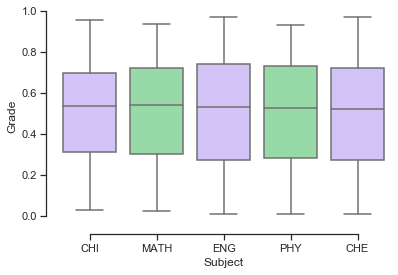

In [22]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="Subject", y="Grade",
             palette=["m", "g"],
            
            data=data.loc[lambda x: x["Subject"].isin(['CHI', 'MATH', 'ENG', 'PHY', 'CHE'])])
sns.despine(offset=10, trim=True)

In [23]:
df[['CHI', 'MATH', 'ENG', 'PHY', 'CHE']].corr("spearman")

,CHI,MATH,ENG,PHY,CHE
CHI,1.000000,0.827622,0.879224,0.779182,0.740587
MATH,0.827622,1.000000,0.873391,0.905495,0.869759
ENG,0.879224,0.873391,1.000000,0.819982,0.765604
PHY,0.779182,0.905495,0.819982,1.000000,0.882621
CHE,0.740587,0.869759,0.765604,0.882621,1.000000


In [24]:
post_string = {'s':[], 'l':[]}
for s in ['s', 'l']:
    for t in range(6, 10):
        for i in range(1, 3):
            for j in range(1, 3):
                if t == 9:
                    if(i == 2 and j ==2):
                        continue
                post_string[s].append("%s%d%d%d"%(s, t, i, j))
data_time_s = df[[i for i in post_string['s']]]
data_time_l = df[[i for i in post_string['l']]]

In [25]:
for idx in data_time_s.columns:
    data_time_s = data_time_s.rename(columns={idx: idx[1:]})
for idx in data_time_l.columns:
    data_time_l = data_time_l.rename(columns={idx: idx[1:]})

In [26]:
data_time_s

,611,612,621,622,711,712,721,722,811,812,821,822,911,912,921
1,0.366071,0.842262,0.672619,0.577381,0.482143,0.979167,0.880952,0.889881,0.630952,0.639881,0.613095,0.626488,0.541667,0.692460,0.745040
2,0.958333,0.991071,0.869048,0.744048,0.773810,0.741071,0.880952,0.889881,0.895833,0.889881,0.625000,0.849702,0.937500,0.941468,0.847222
3,0.812500,0.872024,0.955357,0.675595,0.773810,0.922619,0.934524,0.889881,0.790179,0.750000,0.867560,0.864583,0.855159,0.919643,0.924603
4,0.812500,0.800595,0.672619,0.410714,0.627976,0.866071,0.633929,0.797619,0.760417,0.599702,0.864583,0.750000,0.757937,0.593254,0.708333
5,0.526786,0.586310,0.770833,0.470238,0.410714,0.693452,0.595238,0.619048,0.433036,0.593750,0.361607,0.351190,0.590278,0.667659,0.717262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.062500,0.083333,0.059524,0.035714,0.017857,0.032738,0.047619,0.038690,0.080357,0.066964,0.053571,0.059524,0.071429,0.103175,0.069444
239,0.047619,0.136905,0.178571,0.089286,0.071429,0.062500,0.059524,0.083333,0.071429,0.059524,0.059524,0.041667,0.204365,0.122024,0.116071
240,0.279762,0.232143,0.470238,0.083333,0.172619,0.196429,0.419643,0.473214,0.212798,0.480655,0.351190,0.601190,0.439484,0.566468,0.419643
242,0.005952,0.005952,0.011905,0.020833,0.011905,0.032738,0.035714,0.011905,0.022321,0.028274,0.011905,0.046131,0.020833,0.020833,0.023810


In [27]:
for i in data_time_s.columns:
    print(i, " - lilliefors: ",lilliefors(data_time_s[i]))
    x_most_normal, lmbda_optimal = stats.boxcox(data_time_s[i])
    print("Transformed - lilliefors ",lilliefors((data_time_s[i]**(-0.5) - 1)/(-0.5)))

611  - lilliefors:  (0.08648071798272472, 0.0037595393358365744)
Transformed - lilliefors  (0.2765137884853357, 8.065207090330796e-36)
612  - lilliefors:  (0.08621501770265061, 0.003930938009415394)
Transformed - lilliefors  (0.2726142880753989, 9.01009896123853e-35)
621  - lilliefors:  (0.09059365409463227, 0.0018452387218234766)
Transformed - lilliefors  (0.2726336121302033, 8.903784363587089e-35)
622  - lilliefors:  (0.09446093964517954, 0.0009106867291564881)
Transformed - lilliefors  (0.26576256687043354, 5.728067911279277e-33)
711  - lilliefors:  (0.09350274271760006, 0.0010884454892569186)
Transformed - lilliefors  (0.27193961841026004, 1.362894536818342e-34)
712  - lilliefors:  (0.08643779842779475, 0.0037867545386813333)
Transformed - lilliefors  (0.2729983380057569, 7.115520160060343e-35)
721  - lilliefors:  (0.09114482884513686, 0.0016722243101683302)
Transformed - lilliefors  (0.2716252552910119, 1.6521409420680886e-34)
722  - lilliefors:  (0.08636039771043391, 0.0038362903

C:\Users\72697\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [28]:
data_time_l

,611,612,621,622,711,712,721,722,811,812,821,822,911,912,921
1,0.706845,0.684524,0.958333,0.860119,0.747024,0.812500,0.955357,0.730655,0.796131,0.772321,0.791667,0.654762,0.833333,0.821429,0.736607
2,0.854167,0.934524,0.936012,0.907738,0.898810,0.971726,0.898810,0.938988,0.961310,0.941964,0.927083,0.843750,0.955357,0.936012,0.983631
3,0.872024,0.955357,0.962798,0.943452,0.888393,0.986607,0.796131,0.955357,0.961310,0.910714,0.949405,0.979167,0.866071,0.962798,0.991071
4,0.953869,0.900298,0.901786,0.910714,0.791667,0.782738,0.867560,0.761905,0.910714,0.791667,0.825893,0.653274,0.818452,0.947917,0.767857
5,0.889881,0.767857,0.901786,0.860119,0.879464,0.641369,0.700893,0.702381,0.803571,0.747024,0.668155,0.627976,0.709821,0.781250,0.608631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.099702,0.049107,0.186012,0.184524,0.017857,0.171131,0.281250,0.108631,0.197917,0.194940,0.032738,0.114583,0.108631,0.066964,0.062500
239,0.032738,0.087798,0.190476,0.077381,0.102679,0.136905,0.114583,0.110119,0.123512,0.069940,0.035714,0.014881,0.035714,0.041667,0.032738
240,0.270833,0.245536,0.379464,0.500000,0.415179,0.388393,0.465774,0.358631,0.559524,0.316964,0.379464,0.520833,0.313988,0.440476,0.453869
242,0.077381,0.049107,0.022321,0.069940,0.069940,0.046131,0.086310,0.061012,0.053571,0.043155,0.037202,0.059524,0.034226,0.056548,0.059524


In [29]:
for i in data_time_l.columns:
    print(i, " - lilliefors: ",lilliefors(data_time_l[i]))
    x_most_normal, lmbda_optimal = stats.boxcox(data_time_l[i])
    print("Transformed - lilliefors ",lilliefors((data_time_l[i]**(-0.5) - 1)/(-0.5)))

611  - lilliefors:  (0.103483013876292, 0.00015253819460041065)
Transformed - lilliefors  (0.22946563187021857, 3.1315670247340083e-24)
612  - lilliefors:  (0.07907304559016803, 0.012229169859686449)
Transformed - lilliefors  (0.22052556194253814, 2.737941477642251e-22)
621  - lilliefors:  (0.08773958241585189, 0.0030367037066775454)
Transformed - lilliefors  (0.23064958676954372, 1.7075933752698096e-24)
622  - lilliefors:  (0.06844957272366453, 0.05276533679054068)
Transformed - lilliefors  (0.23936407216511546, 1.7738060347103064e-26)
711  - lilliefors:  (0.07692967396024586, 0.0167866181196163)
Transformed - lilliefors  (0.24949293011517537, 6.985122307905591e-29)
712  - lilliefors:  (0.07401441164571787, 0.025374410150479667)
Transformed - lilliefors  (0.2713916002765795, 1.9059263614696985e-34)
721  - lilliefors:  (0.07302997006948875, 0.02903954312303007)
Transformed - lilliefors  (0.24172568357535829, 4.98624086838837e-27)
722  - lilliefors:  (0.06749492708548277, 0.059381919926

C:\Users\72697\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [30]:
data_sex_time_l = pd.concat([df['Sex'], data_time_l],axis=1,join='inner')
data_sex_time_s = pd.concat([df['Sex'], data_time_s],axis=1,join='inner')

In [31]:
# data_sex_time_s.rename(columns={'611': 610})
for t in range(6, 10):
    for i in range(1, 3):
        for j in range(1, 3):
            if t == 9:
                if(i == 2 and j ==2):
                    continue
            data_sex_time_s= data_sex_time_s.rename(columns={'%d%d%d'%(t, i, j): 4 * (t - 6) + 2 * (i - 1) + (j - 1)})# if j == 1 else data_sex_time_s.rename(columns={'%d%d%d'%(t, i, j): '%d%d%d'%(t - 6, i, 5)})
            data_sex_time_l= data_sex_time_l.rename(columns={'%d%d%d'%(t, i, j): 4 * (t - 6) + 2 * (i - 1) + (j - 1)})# if j == 1 else data_sex_time_l.rename(columns={'%d%d%d'%(t, i, j): '%d%d%d'%(t - 6, i, 5)})

In [32]:
data_sex_time_s

,Sex,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,F,0.366071,0.842262,0.672619,0.577381,0.482143,0.979167,0.880952,0.889881,0.630952,0.639881,0.613095,0.626488,0.541667,0.692460,0.745040
2,F,0.958333,0.991071,0.869048,0.744048,0.773810,0.741071,0.880952,0.889881,0.895833,0.889881,0.625000,0.849702,0.937500,0.941468,0.847222
3,F,0.812500,0.872024,0.955357,0.675595,0.773810,0.922619,0.934524,0.889881,0.790179,0.750000,0.867560,0.864583,0.855159,0.919643,0.924603
4,F,0.812500,0.800595,0.672619,0.410714,0.627976,0.866071,0.633929,0.797619,0.760417,0.599702,0.864583,0.750000,0.757937,0.593254,0.708333
5,F,0.526786,0.586310,0.770833,0.470238,0.410714,0.693452,0.595238,0.619048,0.433036,0.593750,0.361607,0.351190,0.590278,0.667659,0.717262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,M,0.062500,0.083333,0.059524,0.035714,0.017857,0.032738,0.047619,0.038690,0.080357,0.066964,0.053571,0.059524,0.071429,0.103175,0.069444
239,M,0.047619,0.136905,0.178571,0.089286,0.071429,0.062500,0.059524,0.083333,0.071429,0.059524,0.059524,0.041667,0.204365,0.122024,0.116071
240,M,0.279762,0.232143,0.470238,0.083333,0.172619,0.196429,0.419643,0.473214,0.212798,0.480655,0.351190,0.601190,0.439484,0.566468,0.419643
242,M,0.005952,0.005952,0.011905,0.020833,0.011905,0.032738,0.035714,0.011905,0.022321,0.028274,0.011905,0.046131,0.020833,0.020833,0.023810


In [33]:
# m - s

In [34]:
tmp_data_m_time_s = pd.concat([df['Index'], data_sex_time_s],axis=1,join='inner').loc[data_sex_time_s['Sex'] == 'M'].drop('Sex', axis=1)
tmp_data_m_time_s = tmp_data_m_time_s.set_index('Index')
tmp_data_m_time_s = tmp_data_m_time_s.stack()
tmp_data_m_time_s.index = tmp_data_m_time_s.index.rename('Time', level=1)
tmp_data_m_time_s.name = 'Grade'
tmp_data_m_time_s = tmp_data_m_time_s.reset_index()

tmp_data_m_time_s_x = np.array([int(i) for i in list(tmp_data_m_time_s['Time'])])
tmp_data_m_time_s_y = np.array([int(i) for i in list(tmp_data_m_time_s['Grade'])])

In [35]:
tmp_data_f_time_s = pd.concat([df['Index'], data_sex_time_s],axis=1,join='inner').loc[data_sex_time_s['Sex'] == 'F'].drop('Sex', axis=1)
tmp_data_f_time_s = tmp_data_f_time_s.set_index('Index')
tmp_data_f_time_s = tmp_data_f_time_s.stack()
tmp_data_f_time_s.index = tmp_data_f_time_s.index.rename('Time', level=1)
tmp_data_f_time_s.name = 'Grade'
tmp_data_f_time_s = tmp_data_f_time_s.reset_index()

tmp_data_f_time_s_x = np.array([int(i) for i in list(tmp_data_f_time_s['Time'])])
tmp_data_f_time_s_y = np.array([int(i) for i in list(tmp_data_f_time_s['Grade'])])

In [36]:
tmp_data_m_time_l = pd.concat([df['Index'], data_sex_time_l],axis=1,join='inner').loc[data_sex_time_l['Sex'] == 'M'].drop('Sex', axis=1)
tmp_data_m_time_l = tmp_data_m_time_l.set_index('Index')
tmp_data_m_time_l = tmp_data_m_time_l.stack()
tmp_data_m_time_l.index = tmp_data_m_time_l.index.rename('Time', level=1)
tmp_data_m_time_l.name = 'Grade'
tmp_data_m_time_l = tmp_data_m_time_l.reset_index()

tmp_data_m_time_l_x = np.array([int(i) for i in list(tmp_data_m_time_l['Time'])])
tmp_data_m_time_l_y = np.array([int(i) for i in list(tmp_data_m_time_l['Grade'])])

In [37]:
tmp_data_f_time_l = pd.concat([df['Index'], data_sex_time_l],axis=1,join='inner').loc[data_sex_time_l['Sex'] == 'F'].drop('Sex', axis=1)
tmp_data_f_time_l = tmp_data_f_time_l.set_index('Index')
tmp_data_f_time_l = tmp_data_f_time_l.stack()
tmp_data_f_time_l.index = tmp_data_f_time_l.index.rename('Time', level=1)
tmp_data_f_time_l.name = 'Grade'
tmp_data_f_time_l = tmp_data_f_time_l.reset_index()

tmp_data_f_time_l_x = np.array([int(i) for i in list(tmp_data_f_time_l['Time'])])
tmp_data_f_time_l_y = np.array([int(i) for i in list(tmp_data_f_time_l['Grade'])])

In [38]:
tmp_data_m_time_s['Time'] = tmp_data_m_time_s['Time'].apply(lambda x: int(x))
tmp_data_f_time_s['Time'] = tmp_data_f_time_s['Time'].apply(lambda x: int(x))
tmp_data_m_time_l['Time'] = tmp_data_m_time_l['Time'].apply(lambda x: int(x))
tmp_data_f_time_l['Time'] = tmp_data_f_time_l['Time'].apply(lambda x: int(x))

In [39]:
# based on gender

In [40]:
tmp_data_time_delta = pd.concat([df['Index'], data_sex_time_s],axis=1,join='inner')
tmp_data_time_delta = tmp_data_time_delta.set_index(['Index', 'Sex'])
tmp_data_time_delta = tmp_data_time_delta.stack()
tmp_data_time_delta.index = tmp_data_time_delta.index.rename('Time', level=2)
tmp_data_time_delta.name = 's_Grade'
tmp_data_time_delta = tmp_data_time_delta.reset_index()

tmp_data_time_delta['Time'] = tmp_data_time_delta['Time'].apply(lambda x: int(x))

tmp_data_time_l = pd.concat([df['Index'], data_sex_time_l],axis=1,join='inner')
tmp_data_time_l = tmp_data_time_l.set_index(['Index', 'Sex'])
tmp_data_time_l = tmp_data_time_l.stack()
tmp_data_time_l.index = tmp_data_time_l.index.rename('Time', level=2)
tmp_data_time_l.name = 'Grade'
tmp_data_time_l = tmp_data_time_l.reset_index()
tmp_data_time_l['Time'] = tmp_data_time_delta['Time'].apply(lambda x: int(x))

tmp_data_time_delta['delta'] = tmp_data_time_delta['s_Grade'] - tmp_data_time_l['Grade']
tmp_data_time_delta = tmp_data_time_delta.drop('s_Grade', axis=1)

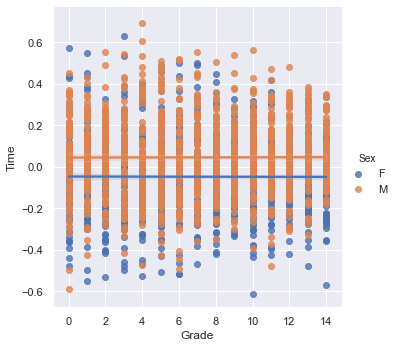

In [41]:
sns.set()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x="Time", y="delta", hue="Sex",
               height=5, data=tmp_data_time_delta)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Grade", "Time")

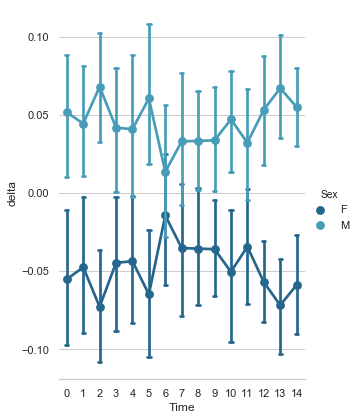

In [42]:
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="Time", y="delta", hue="Sex",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=tmp_data_time_delta)
g.despine(left=True)

In [43]:
# linear reg

In [44]:
tmp_data_time_delta_m_x = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M']['Time']
tmp_data_time_delta_m_y = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M']['delta']
l_xx = np.sum(tmp_data_time_delta_m_x**2) - len(tmp_data_time_delta_m_x) * (np.mean(tmp_data_time_delta_m_x))**2
l_xy = np.sum(tmp_data_time_delta_m_x * tmp_data_time_delta_m_y) - len(tmp_data_time_delta_m_x) * np.mean(tmp_data_time_delta_m_x) * np.mean(tmp_data_time_delta_m_y)
s_m_delta_hat_beta_1 = l_xy / l_xx
s_m_delta_hat_beta_0 = np.mean(tmp_data_time_delta_m_y) - s_m_delta_hat_beta_1 * np.mean(tmp_data_time_delta_m_x)
print(s_m_delta_hat_beta_1, s_m_delta_hat_beta_0)
s_m_delta_epsilon = tmp_data_time_delta_m_y - s_m_delta_hat_beta_1 * tmp_data_time_delta_m_x - s_m_delta_hat_beta_0

0.0001155982028827069 0.044114944429240195


In [45]:
tmp_data_time_delta_f_x = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F']['Time']
tmp_data_time_delta_f_y = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F']['delta']
l_xx = np.sum(tmp_data_time_delta_f_x**2) - len(tmp_data_time_delta_f_x) * (np.mean(tmp_data_time_delta_f_x))**2
l_xy = np.sum(tmp_data_time_delta_f_x * tmp_data_time_delta_f_y) - len(tmp_data_time_delta_f_x) * np.mean(tmp_data_time_delta_f_x) * np.mean(tmp_data_time_delta_f_y)
s_f_delta_hat_beta_1 = l_xy / l_xx
s_f_delta_hat_beta_0 = np.mean(tmp_data_time_delta_f_y) - s_f_delta_hat_beta_1 * np.mean(tmp_data_time_delta_f_x)
print(s_f_delta_hat_beta_1, s_f_delta_hat_beta_0)
s_f_delta_epsilon = tmp_data_time_delta_f_y - s_f_delta_hat_beta_1 * tmp_data_time_delta_f_x - s_f_delta_hat_beta_0

-0.00012416103272585032 -0.0473827180906656


In [46]:
# non-linear reg

In [47]:
def plot_polynomail_reg(df1, df2, target_col):
    plt.scatter(np.array(df1['Time']).reshape(-1, 1),np.array(df1[target_col]).reshape(-1, 1), color='lightblue')
    plt.scatter(np.array(df2['Time']).reshape(-1, 1),np.array(df2[target_col]).reshape(-1, 1), color='pink')
    
    poly_features_1 = PolynomialFeatures(degree=2, include_bias=False)
    X_poly_1 = poly_features_1.fit_transform(np.array(df1['Time']).reshape(-1, 1))
    lin_reg_1 = LinearRegression()
    lin_reg_1.fit(X_poly_1, np.array(df1[target_col]).reshape(-1, 1))
    print(lin_reg_1.intercept_, lin_reg_1.coef_)
    print("Predict Score for Male: ", lin_reg_1.score(X_poly_1, np.array(df1[target_col]).reshape(-1, 1)))
    model_1 = sm.OLS(np.array(df1[target_col]).reshape(-1, 1), np.array(df1['Time']).reshape(-1, 1))
    results_1 = model_1.fit()
    print("Results 1: ", results_1.params)
    print("Model 1's Summary: ", results_1.summary())
    
    poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
    X_poly_2 = poly_features_2.fit_transform(np.array(df2['Time']).reshape(-1, 1))
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly_2, np.array(df2[target_col]).reshape(-1, 1))
    print(lin_reg_2.intercept_, lin_reg_2.coef_)
    print("Predict Score for Male: ", lin_reg_2.score(X_poly_2, np.array(df2[target_col]).reshape(-1, 1)))
    model_2 = sm.OLS(np.array(df2[target_col]).reshape(-1, 1), np.array(df2['Time']).reshape(-1, 1))
    results_2 = model_2.fit()
    print("Results 2: ", results_2.params)
    print("Model 2's Summary: ", results_2.summary())

    fitted_x_1 = np.linspace(np.array(df1['Time']).min(), np.array(df1['Time']).max(), 50)
    fitted_x_transformed_1 = poly_features_1.fit_transform(fitted_x_1.reshape(-1, 1))
    fitted_y_1 = lin_reg_1.predict(fitted_x_transformed_1)
    plt.plot(fitted_x_1, fitted_y_1, color='darkblue')
    
    fitted_x_2 = np.linspace(np.array(df2['Time']).min(), np.array(df2['Time']).max(), 50)
    fitted_x_transformed_2 = poly_features_2.fit_transform(fitted_x_2.reshape(-1, 1))
    fitted_y_2 = lin_reg_2.predict(fitted_x_transformed_2)
    plt.plot(fitted_x_2, fitted_y_2, color='red')
    plt.show()

[0.05925505] [[-0.00687214  0.00049912]]
Predict Score for Male:  0.002178959738897146
Results 1:  [0.00467921]
Model 1's Summary:                                   OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.044
Model:                            OLS   Adj. R-squared (uncentered):              0.043
Method:                 Least Squares   F-statistic:                              60.20
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.72e-14
Time:                        22:34:07   Log-Likelihood:                          392.27
No. Observations:                1305   AIC:                                     -782.5
Df Residuals:                    1304   BIC:                                     -777.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                       

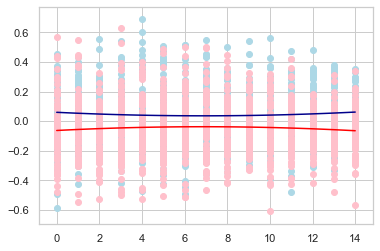

In [48]:
plot_polynomail_reg(tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M'] ,tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F'], 'delta')

In [49]:
# based on subject

In [50]:
tmp_data_time_s = pd.concat([df['Index'], data_sex_time_s],axis=1,join='inner')
tmp_data_time_s = tmp_data_time_s.set_index(['Index', 'Sex'])
tmp_data_time_s = tmp_data_time_s.stack()
tmp_data_time_s.index = tmp_data_time_s.index.rename('Time', level=2)
tmp_data_time_s.name = 'Grade'
tmp_data_time_s = tmp_data_time_s.reset_index()
tmp_data_time_s['Time'] = tmp_data_time_s['Time'].apply(lambda x: int(x))

tmp_data_time_l = pd.concat([df['Index'], data_sex_time_l],axis=1,join='inner')
tmp_data_time_l = tmp_data_time_l.set_index(['Index', 'Sex'])
tmp_data_time_l = tmp_data_time_l.stack()
tmp_data_time_l.index = tmp_data_time_l.index.rename('Time', level=2)
tmp_data_time_l.name = 'Grade'
tmp_data_time_l = tmp_data_time_l.reset_index()
tmp_data_time_l['Time'] = tmp_data_time_l['Time'].apply(lambda x: int(x))

In [51]:
# Science

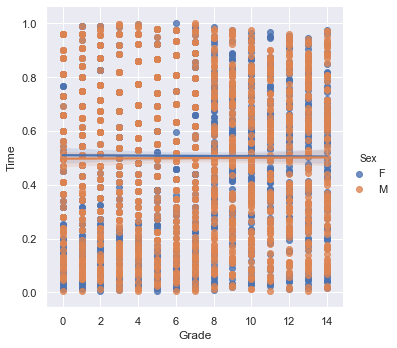

In [52]:
sns.set()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x="Time", y="Grade", hue="Sex",
               height=5, data=tmp_data_time_s)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Grade", "Time")

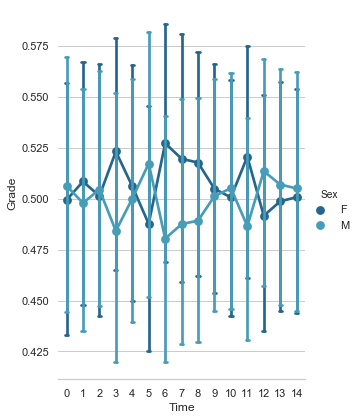

In [53]:
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="Time", y="Grade", hue="Sex",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=tmp_data_time_s)
g.despine(left=True)

In [54]:
l_xx = np.sum(tmp_data_m_time_s_x**2) - len(tmp_data_m_time_s_x) * (np.mean(tmp_data_m_time_s_x))**2
l_xy = np.sum(tmp_data_m_time_s_x * tmp_data_m_time_s_y) - len(tmp_data_m_time_s_x) * np.mean(tmp_data_m_time_s_x) * np.mean(tmp_data_m_time_s_y)
s_m_hat_beta_1 = l_xy / l_xx
s_m_hat_beta_0 = np.mean(tmp_data_m_time_s_y) - s_m_hat_beta_1 * np.mean(tmp_data_m_time_s_x)
print(s_m_hat_beta_1, s_m_hat_beta_0)
s_m_epsilon = tmp_data_m_time_s_y - s_m_hat_beta_1 * tmp_data_m_time_s_x - s_m_hat_beta_0

0.0 0.0007662835249042146


In [55]:
l_xx = np.sum(tmp_data_f_time_s_x**2) - len(tmp_data_f_time_s_x) * (np.mean(tmp_data_f_time_s_x))**2
l_xy = np.sum(tmp_data_f_time_s_x * tmp_data_f_time_s_y) - len(tmp_data_f_time_s_x) * np.mean(tmp_data_f_time_s_x) * np.mean(tmp_data_f_time_s_y)
s_f_hat_beta_1 = l_xy / l_xx
s_f_hat_beta_0 = np.mean(tmp_data_f_time_s_y) - s_f_hat_beta_1 * np.mean(tmp_data_f_time_s_x)
print(s_f_hat_beta_1, s_f_hat_beta_0)
s_f_epsilon = tmp_data_f_time_s_y - s_f_hat_beta_1 * tmp_data_f_time_s_x - s_f_hat_beta_0

-4.409171075837743e-05 0.001131687242798354


In [56]:
# Literature

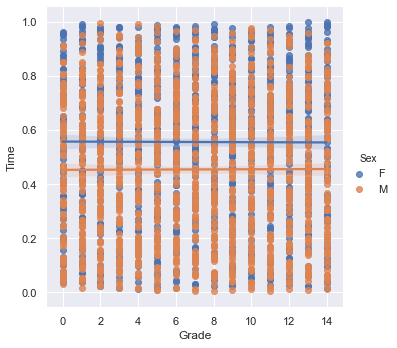

In [57]:
sns.set()


# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x="Time", y="Grade", hue="Sex",
               height=5, data=tmp_data_time_l)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Grade", "Time")

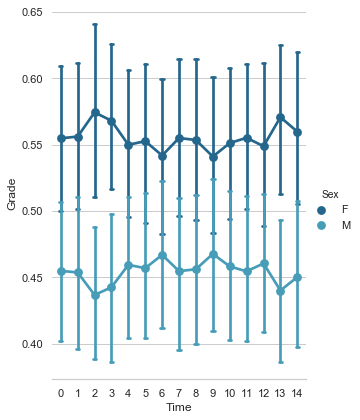

In [58]:
sns.set(style="whitegrid")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="Time", y="Grade", hue="Sex",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=tmp_data_time_l)
g.despine(left=True)

In [59]:
l_xx = np.sum(tmp_data_m_time_l_x**2) - len(tmp_data_m_time_l_x) * (np.mean(tmp_data_m_time_l_x))**2
l_xy = np.sum(tmp_data_m_time_l_x * tmp_data_m_time_l_y) - len(tmp_data_m_time_l_x) * np.mean(tmp_data_m_time_l_x) * np.mean(tmp_data_m_time_s_y)
l_m_hat_beta_1 = l_xy / l_xx
l_m_hat_beta_0 = np.mean(tmp_data_m_time_l_y) - l_m_hat_beta_1 * np.mean(tmp_data_m_time_l_x)
print(l_m_hat_beta_1, l_m_hat_beta_0)
l_m_epsilon = tmp_data_m_time_l_y - l_m_hat_beta_1 * tmp_data_m_time_l_x - l_m_hat_beta_0

-0.00028735632183908046 0.002011494252873563


In [60]:
l_xx = np.sum(tmp_data_f_time_l_x**2) - len(tmp_data_f_time_l_x) * (np.mean(tmp_data_f_time_l_x))**2
l_xy = np.sum(tmp_data_f_time_l_x * tmp_data_f_time_l_y) - len(tmp_data_f_time_l_x) * np.mean(tmp_data_f_time_l_x) * np.mean(tmp_data_f_time_s_y)
l_f_hat_beta_1 = l_xy / l_xx
l_f_hat_beta_0 = np.mean(tmp_data_f_time_l_y) - l_f_hat_beta_1 * np.mean(tmp_data_f_time_l_x)
print(l_f_hat_beta_1, l_f_hat_beta_0)
l_f_epsilon = tmp_data_f_time_l_y - l_f_hat_beta_1 * tmp_data_f_time_l_x - l_f_hat_beta_0

0.00026455026455026457 -0.00102880658436214


In [61]:
model_str_0 = (('delta ~ C({0}) + C({1}) + ' +
            'C({0}):C({1})').
            format('Sex', 'Time'))
model_0 = ols(model_str_0, data=tmp_data_time_delta).fit()
print(model_0.params)
anova_table_0 = sm.stats.anova_lm(model_0, typ=1).replace(np.nan, '', regex=True)
print(anova_table_0)
print(model_0.summary())

Intercept                   -0.055335
C(Sex)[T.M]                  0.106854
C(Time)[T.1]                 0.007771
C(Time)[T.2]                -0.017582
C(Time)[T.3]                 0.010545
C(Time)[T.4]                 0.011611
C(Time)[T.5]                -0.009608
C(Time)[T.6]                 0.040840
C(Time)[T.7]                 0.019988
C(Time)[T.8]                 0.019658
C(Time)[T.9]                 0.019272
C(Time)[T.10]                0.004832
C(Time)[T.11]                0.020870
C(Time)[T.12]               -0.001733
C(Time)[T.13]               -0.016583
C(Time)[T.14]               -0.003631
C(Sex)[T.M]:C(Time)[T.1]    -0.015006
C(Sex)[T.M]:C(Time)[T.2]     0.033951
C(Sex)[T.M]:C(Time)[T.3]    -0.020363
C(Sex)[T.M]:C(Time)[T.4]    -0.022421
C(Sex)[T.M]:C(Time)[T.5]     0.018554
C(Sex)[T.M]:C(Time)[T.6]    -0.078863
C(Sex)[T.M]:C(Time)[T.7]    -0.038598
C(Sex)[T.M]:C(Time)[T.8]    -0.037959
C(Sex)[T.M]:C(Time)[T.9]    -0.037214
C(Sex)[T.M]:C(Time)[T.10]   -0.009330
C(Sex)[T.M]:

In [62]:
for i in range(15):
    m_grade_delta = np.array(tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M'].loc[tmp_data_time_delta['Time'] == i]['delta'])
    f_grade_delta = np.array(tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F'].loc[tmp_data_time_delta['Time'] == i]['delta'])
    t, p_value = stats.ttest_ind(m_grade_delta, f_grade_delta, equal_var= False)
    p_value_onetail = p_value / 2
    print("Time: %d "%(i), "t: ", t, " one tailed p-value: ", p_value_onetail)

Time: 0  t:  3.4530451007800944  one tailed p-value:  0.0003520239708194696
Time: 1  t:  3.2068283931970973  one tailed p-value:  0.0008123907333533205
Time: 2  t:  5.517477300095388  one tailed p-value:  6.555619550897322e-08
Time: 3  t:  2.791701770108372  one tailed p-value:  0.002939870615054982
Time: 4  t:  2.670587636284467  one tailed p-value:  0.004165665491192342
Time: 5  t:  3.938754594843291  one tailed p-value:  6.020316463225125e-05
Time: 6  t:  0.920163012997712  one tailed p-value:  0.17941469867298437
Time: 7  t:  2.329122746216235  one tailed p-value:  0.010534415049928485
Time: 8  t:  2.652821285894073  one tailed p-value:  0.0043893694794961404
Time: 9  t:  2.9696309831897687  one tailed p-value:  0.0017120386720881455
Time: 10  t:  3.640904964967523  one tailed p-value:  0.00018371033916242478
Time: 11  t:  2.531483826163245  one tailed p-value:  0.006143649956362493
Time: 12  t:  5.082618057891194  one tailed p-value:  5.347290318005881e-07
Time: 13  t:  6.13667900

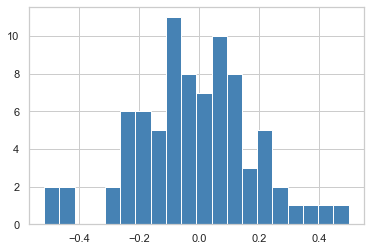

In [109]:
tmp_x6_f = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F'].loc[tmp_data_time_delta['Time'] == 6]['delta']
plt.hist(x = tmp_x6_f,
          bins = 20,
          color = 'steelblue',
          )
plt.savefig("f6.png")

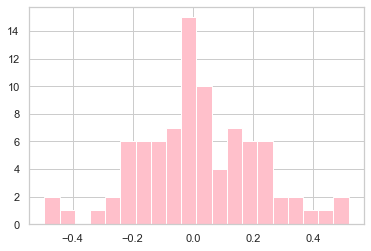

In [108]:
tmp_x6_m = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M'].loc[tmp_data_time_delta['Time'] == 6]['delta']
plt.hist(x = tmp_x6_m,
          bins = 20,
          color = 'pink',
          )
plt.savefig("m6.png")

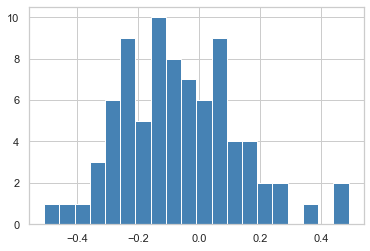

In [110]:
tmp_x = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F'].loc[tmp_data_time_delta['Time'] == 5]['delta']
plt.hist(x = tmp_x,
          bins = 20,
          color = 'steelblue',
          )
plt.savefig("f5.png")

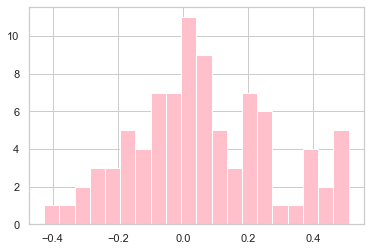

In [111]:
tmp_x6_m = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M'].loc[tmp_data_time_delta['Time'] == 5]['delta']
plt.hist(x = tmp_x6_m,
          bins = 20,
          color = 'pink',
          )
plt.savefig("m5.png")

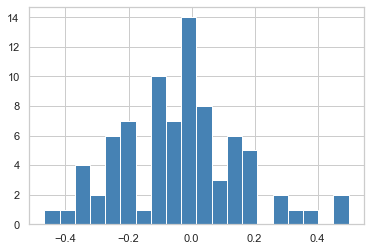

In [112]:
tmp_x6_m = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'F'].loc[tmp_data_time_delta['Time'] == 7]['delta']
plt.hist(x = tmp_x6_m,
          bins = 20,
          color = 'steelblue',
          )
plt.savefig("f7.png")

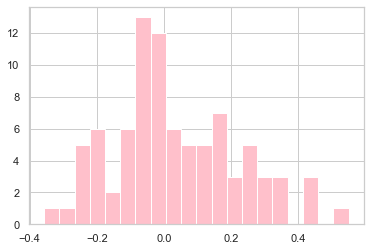

In [113]:
tmp_x6_m = tmp_data_time_delta.loc[tmp_data_time_delta['Sex'] == 'M'].loc[tmp_data_time_delta['Time'] == 7]['delta']
plt.hist(x = tmp_x6_m,
          bins = 20,
          color = 'pink',
          )
plt.savefig("m7.png")

In [65]:
# grade - 7 - 1st -semiter - final: reduce the gap between 2 genders.

In [66]:
# split by terms
# tmp_data_time_delta = 
for t in range(6, 10):
    data_time_s['%d'%(t)] = 0
    data_time_l['%d'%(t)] = 0
    for i in range(1, 3):
        for j in range(1, 3):
            if(t == 9):
                if(i == 2 and j ==2):
                    continue
            data_time_s['%d'%(t)] += data_time_s['%d%d%d'%(t, i, j)] / 4 if t != 9 else data_time_s['%d%d%d'%(t, i, j)] / 3
            data_time_l['%d'%(t)] += data_time_l['%d%d%d'%(t, i, j)] / 4 if t != 9 else data_time_l['%d%d%d'%(t, i, j)] / 3

In [67]:
data_tmp_termed_s = data_time_s[['6', '7', '8', '9']]
data_tmp_termed_l = data_time_l[['6', '7', '8', '9']]
data_tmp_termed_delta = data_tmp_termed_s - data_tmp_termed_l
data_tmp_termed_delta_tb = data_tmp_termed_delta

data_tmp_termed_delta = pd.concat([df['Sex'], data_tmp_termed_delta],axis=1,join='inner')
data_tmp_termed_delta = pd.concat([df['Index'], data_tmp_termed_delta],axis=1,join='inner')
data_tmp_termed_delta = data_tmp_termed_delta.set_index(['Index', 'Sex'])
data_tmp_termed_delta = data_tmp_termed_delta.stack()
data_tmp_termed_delta.index = data_tmp_termed_delta.index.rename('Time', level=2)
data_tmp_termed_delta.name = 'Grade'
data_tmp_termed_delta = data_tmp_termed_delta.reset_index()
data_tmp_termed_delta['Time'] = data_tmp_termed_delta['Time'].apply(lambda x: int(x))

In [68]:
data_tmp_termed_delta

,Index,Sex,Time,Grade
0,A01,F,6,-0.187872
1,A01,F,7,-0.003348
2,A01,F,8,-0.126116
3,A01,F,9,-0.137401
4,A02,F,6,-0.017485
...,...,...,...,...
667,G29,M,9,-0.028274
668,G30,M,6,-0.081845
669,G30,M,7,-0.051339
670,G30,M,8,0.036086


In [69]:
model_str = (('Grade ~ C({0}) + C({1}) + ' +
            'C({0}):C({1})').
            format('Sex', 'Time'))

In [70]:
model_str

'Grade ~ C(Sex) + C(Time) + C(Sex):C(Time)'

In [71]:
from statsmodels.formula.api import ols
model = ols(model_str, data=data_tmp_termed_delta).fit()
print(model.params)

Intercept                  -0.055151
C(Sex)[T.M]                 0.106499
C(Time)[T.7]                0.015524
C(Time)[T.8]                0.015974
C(Time)[T.9]               -0.007500
C(Sex)[T.M]:C(Time)[T.7]   -0.029977
C(Sex)[T.M]:C(Time)[T.8]   -0.030846
C(Sex)[T.M]:C(Time)[T.9]    0.014482
dtype: float64


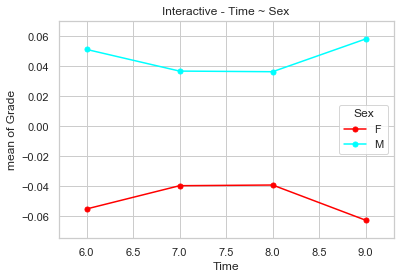

In [72]:
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(x=data_tmp_termed_delta['Time'], trace=data_tmp_termed_delta['Sex'], response=data_tmp_termed_delta['Grade'],
                     ms=10)
plt.title('Interactive - Time ~ Sex')
plt.show()

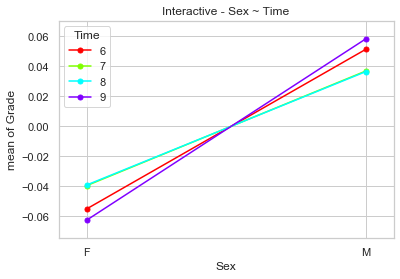

In [73]:
interaction_plot(x=data_tmp_termed_delta['Sex'], trace=data_tmp_termed_delta['Time'], response=data_tmp_termed_delta['Grade'],
                     ms=10)
plt.title('Interactive - Sex ~ Time')
plt.show()

In [74]:
anova_table = sm.stats.anova_lm(model, typ=1).replace(np.nan, '', regex=True)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Sex),1.0,1.511520e+00,1.511520e+00,90.032,4.11063e-20
C(Time),3.0,1.545077e-31,5.150258e-32,3.06769e-30,1
C(Sex):C(Time),3.0,6.388390e-02,2.129463e-02,1.26839,0.284216
Residual,664.0,1.114770e+01,1.678870e-02,,


In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     13.41
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.04e-16
Time:                        22:34:24   Log-Likelihood:                 423.75
No. Observations:                 672   AIC:                            -831.5
Df Residuals:                     664   BIC:                            -795.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0552      0.014     -3.831      0.000      -0.083      -0.027
C(Sex)[T.M]                  0.1065      0.020      5.323      0.000       0.067       0.146
C(Time)[T.7]                 0.0155      0.020      0.762      0.446      -0.024       0.056
C(Time)[T.8]                 0.0160      0.020      0.785      0.433      -0.024       0.056
C(Time)[T.9]                -0.0075      0.020     -0.368      0.713      -0.047       0.032
C(Sex)[T.M]:C(Time)[T.7]    -0.0300      0.028     -1.060      0.290      -0.086       0.026
C(Sex)[T.M]:C(Time)[T.8]    -0.0308      0.028     -1.090      0.276      -0.086       0.025
C(Sex)[T.M]:C(Time)[T.9]     0.0145      0.028      0.512      0.609      -0.041       0.070
==============================================================================
Omnibus:                        8.213   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                9.464
Skew:                           0.173   Prob(JB):                      0.00881
Kurtosis:                       3.466   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
model_str_2 = (('Grade ~ C({0}) + C({1})').
            format('Sex', 'Time'))
model_2 = ols(model_str_2, data=data_tmp_termed_delta).fit()
print("Parameters: ", model_2.params)
anova_table_2 = sm.stats.anova_lm(model_2, typ=1).replace(np.nan, '', regex=True)

Parameters:  Intercept      -4.915180e-02
C(Sex)[T.M]     9.491381e-02
C(Time)[T.7]    1.013413e-17
C(Time)[T.8]   -1.185527e-17
C(Time)[T.9]    1.571525e-17
dtype: float64


In [100]:
anova_table_2

,df,sum_sq,mean_sq,F,PR(>F)
C(Sex),1.0,1.511520e+00,1.511520e+00,89.9234,4.26342e-20
C(Time),3.0,9.802983e-32,3.267661e-32,1.944e-30,1
Residual,667.0,1.121158e+01,1.680897e-02,,


In [102]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Grade   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     22.48
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.95e-17
Time:                        01:09:22   Log-Likelihood:                 421.83
No. Observations:                 672   AIC:                            -833.7
Df Residuals:                     667   BIC:                            -811.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0492      0.011     -4.363      0.000      -0.071      -0.027
C(Sex)[T.M]      0.0949      0.010      9.483      0.000       0.075       0.115
C(Time)[T.7]  1.013e-17      0.014   7.16e-16      1.000      -0.028       0.028
C(Time)[T.8] -1.186e-17      0.014  -8.38e-16      1.000      -0.028       0.028
C(Time)[T.9]  1.572e-17      0.014   1.11e-15      1.000      -0.028       0.028
==============================================================================
Omnibus:                        7.743   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.665
Skew:                           0.176   Prob(JB):                       0.0131
Kurtosis:                       3.431   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
for i in data_tmp_termed_delta_tb.columns:
    print(i, " - lilliefors: ",lilliefors(data_tmp_termed_delta_tb[i]))

6  - lilliefors:  (0.04332949497276162, 0.6790849456569104)
7  - lilliefors:  (0.06018125307460376, 0.19395955247121127)
8  - lilliefors:  (0.03662584410007996, 0.8849381833908179)
9  - lilliefors:  (0.06534091843897771, 0.07690103729811437)


C:\Users\72697\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [77]:
stats.levene(data_tmp_termed_delta_tb['6'], data_tmp_termed_delta_tb['7'], data_tmp_termed_delta_tb['8'], data_tmp_termed_delta_tb['9'],center='median')

LeveneResult(statistic=1.0963040831745465, pvalue=0.3499743897611255)

In [78]:
# normality

In [79]:
# not corresponding to the plot, use Scheirer-Ray-Hare test

In [80]:
model_str_re = (('Grade ~ C({0})').
            format('Sex'))
model_re = ols(model_str_re, data=data_tmp_termed_delta).fit()
print(model_re.params)
anova_table_re = sm.stats.anova_lm(model_re, typ=1).replace(np.nan, '', regex=True)
print(anova_table_re)
print(model_re.summary())

Intercept     -0.049152
C(Sex)[T.M]    0.094914
dtype: float64
             df     sum_sq   mean_sq        F       PR(>F)
C(Sex)      1.0   1.511520  1.511520  90.3279  3.51897e-20
Residual  670.0  11.211581  0.016734                      
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     90.33
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           3.52e-20
Time:                        22:34:24   Log-Likelihood:                 421.83
No. Observations:                 672   AIC:                            -839.7
Df Residuals:                     670   BIC:                            -830.6
Df Model:                           1                                         
Covariance Type:            nonrobust            

In [81]:
# just gender makes some difference, time does not
# use t test 4 times

In [82]:
print("Scheffe: ", sp.posthoc_scheffe(data_tmp_termed_delta, val_col='Grade', group_col='Sex'))

Scheffe:                F             M
F -1.000000e+00  3.518971e-20
M  3.518971e-20 -1.000000e+00


In [83]:
from scipy.stats import ttest_1samp

m_grade_delta = np.array(data_tmp_termed_delta.loc[data_tmp_termed_delta['Sex'] == 'M']['Grade'])
f_grade_delta = np.array(data_tmp_termed_delta.loc[data_tmp_termed_delta['Sex'] == 'F']['Grade'])
t, p_value = stats.ttest_ind(m_grade_delta, f_grade_delta, equal_var= False)
p_value_onetail = p_value / 2
print("t: ", t, " one tailed p-value: ", p_value_onetail)

t:  9.519667478679912  one tailed p-value:  1.5447934852439844e-20


In [84]:
# t > 0 & p-value < 0.05
# right tailed.

In [85]:
for i in range(6, 10):
    m_grade_delta = np.array(data_tmp_termed_delta.loc[data_tmp_termed_delta['Sex'] == 'M'].loc[data_tmp_termed_delta['Time'] == i]['Grade'])
    f_grade_delta = np.array(data_tmp_termed_delta.loc[data_tmp_termed_delta['Sex'] == 'F'].loc[data_tmp_termed_delta['Time'] == i]['Grade'])
    t, p_value = stats.ttest_ind(m_grade_delta, f_grade_delta, equal_var= False)
    p_value_onetail = p_value / 2
    print("Time: %d "%(i), "t: ", t, " one tailed p-value: ", p_value_onetail)

Time: 6  t:  5.379218666789437  one tailed p-value:  1.2700890021487342e-07
Time: 7  t:  3.392099563668977  one tailed p-value:  0.0004336068542946414
Time: 8  t:  3.8802363623138976  one tailed p-value:  7.541215765204612e-05
Time: 9  t:  6.820159752689754  one tailed p-value:  8.225264040590909e-11


In [86]:
# for each term:
# t > 0 & p-value < 0.05
# right tailed.